In [3]:
pip install psycopg2-binary

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [4]:
import psycopg2 # драйвер для postgresql
import getpass  # прячем пароль, чтобы не писать его в параметрах

conn=psycopg2.connect(user='postgres',
                      database='postgres',
                      host='localhost',
                      port='5432',
                      password=getpass.getpass('Insert password: ')
                        )
print(conn.get_dsn_parameters())

Insert password: ········
{'user': 'postgres', 'dbname': 'postgres', 'host': 'localhost', 'port': '5432', 'tty': '', 'options': '', 'sslmode': 'prefer', 'sslcompression': '0', 'krbsrvname': 'postgres', 'target_session_attrs': 'any'}


In [5]:
# Запрос кодов бумаг
import pandas as pd
query_sec="SELECT DISTINCT \"SECCODE\" FROM order_log ORDER BY \"SECCODE\" ASC"
securities=pd.read_sql_query(query_sec,conn)
securities[50:70].head()

,SECCODE
50,FXGD
51,FXIT
52,FXJP
53,FXMM
54,FXRB


In [6]:
# Получение данных из базы
import pandas as pd
query = "SELECT * FROM order_log WHERE \"TIME\" <= 100500000 AND \"SECCODE\" = 'ALRS';"
data = pd.read_sql_query(query,conn)
data.head(10)

,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE
0,49,ALRS,S,100000000,49,1,54.08,600,NaN,NaN
1,50,ALRS,S,100000000,50,1,53.92,2200,NaN,NaN
2,62,ALRS,B,100000000,62,1,52.33,400,NaN,NaN
3,71,ALRS,B,100000000,71,1,52.53,100,NaN,NaN
4,348,ALRS,S,100000000,348,1,55.09,200,NaN,NaN
5,350,ALRS,S,100000000,350,1,55.42,300,NaN,NaN
6,781,ALRS,S,100000000,781,1,53.94,2500,NaN,NaN
7,1077,ALRS,S,100000000,1077,1,54.74,2500,NaN,NaN
8,1204,ALRS,S,100000000,1204,1,54.99,100,NaN,NaN
9,1210,ALRS,S,100000000,1210,1,54.98,100,NaN,NaN


In [7]:
#Сортировка по цене в убывающем порядке
data.sort_values(by=['PRICE'], ascending = False)

,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE
921,139295,ALRS,S,100157834,75176,1,59.80,5300,NaN,NaN
224,12191,ALRS,S,100002070,11130,1,58.70,100,NaN,NaN
126,6851,ALRS,S,100000000,6851,1,58.00,2500,NaN,NaN
11,1261,ALRS,S,100000000,1261,1,58.00,1000,NaN,NaN
48,3197,ALRS,S,100000000,3197,1,57.48,1000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1600,351463,ALRS,S,100442480,179952,2,0.00,1000,2.541198e+09,53.53
1570,339857,ALRS,S,100433666,174170,2,0.00,100,2.541198e+09,53.58
1602,351465,ALRS,S,100442480,179952,2,0.00,100,2.541198e+09,53.52
1604,351467,ALRS,S,100442480,179952,2,0.00,100,2.541198e+09,53.52


In [8]:
data.pivot_table(index = 'PRICE', columns = 'BUYSELL', values = 'VOLUME', aggfunc = 'sum').sort_values(by=['PRICE'], ascending = False)

BUYSELL,B,S
PRICE,,
59.80,NaN,5300.0
58.70,NaN,100.0
58.00,NaN,3500.0
57.48,NaN,1000.0
57.35,NaN,100.0
...,...,...
48.61,4100.0,NaN
48.30,5000.0,NaN
48.25,4600.0,NaN


In [9]:
#Поиск значений, где цена =0 (рыночные заявки)
data[data['PRICE']==0.0]

,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE
952,161283,ALRS,B,100215099,85840,1,0.0,500,NaN,NaN
953,161284,ALRS,B,100215099,85840,2,0.0,500,2.541194e+09,53.74
1566,339853,ALRS,S,100433666,174170,1,0.0,200,NaN,NaN
1568,339855,ALRS,S,100433666,174170,2,0.0,100,2.541198e+09,53.58
1570,339857,ALRS,S,100433666,174170,2,0.0,100,2.541198e+09,53.58
1573,341994,ALRS,S,100435201,175227,1,0.0,200,NaN,NaN
1575,341996,ALRS,S,100435201,175227,2,0.0,200,2.541198e+09,53.58
1588,351451,ALRS,S,100442480,179952,1,0.0,6000,NaN,NaN
1590,351453,ALRS,S,100442480,179952,2,0.0,100,2.541198e+09,53.56
1592,351455,ALRS,S,100442480,179952,2,0.0,1300,2.541198e+09,53.55


In [10]:
# Построение книги лимитированных заявок (LOB - Limit Order Book)

# Устанавливаем маску лимитных заявок заявках (цена не равна 0)
no_mrk_ind=data['PRICE']!=0
#  Таблица выставленных заявок при условии, что цена не равна 0
plc=data[['ORDERNO','BUYSELL','PRICE','VOLUME']][(data['ACTION']==1) & no_mrk_ind]
# Таблица отозванных заявок при условии, что цена не равна 0
wdr=data[['ORDERNO','VOLUME']][(data['ACTION']==0) & no_mrk_ind]
# Таблица исполненных объемов
trds=data[['ORDERNO','VOLUME']][(data['ACTION']==2) & no_mrk_ind] 
trds=trds[['ORDERNO','VOLUME']].groupby(['ORDERNO']).sum()
trds['ORDERNO']=trds.index
trds.index=range(trds.shape[0])

# Книга (aka стакан, aka LOB)
lob=pd.merge(plc,wdr, on='ORDERNO',how='left',suffixes=('_plc','_wdr'))
lob=pd.merge(lob,trds, on='ORDERNO', how='left')
lob=lob.rename(columns={'VOLUME':'VOLUME_trds'})
lob=lob.fillna(0)
lob['TOTAL_VOL']=lob['VOLUME_plc']-lob['VOLUME_wdr']-lob['VOLUME_trds']
lob=lob[lob['TOTAL_VOL']>0]
lob 

,ORDERNO,BUYSELL,PRICE,VOLUME_plc,VOLUME_wdr,VOLUME_trds,TOTAL_VOL
0,49,S,54.08,600,0.0,0.0,600.0
2,62,B,52.33,400,0.0,0.0,400.0
4,348,S,55.09,200,0.0,0.0,200.0
5,350,S,55.42,300,0.0,0.0,300.0
6,781,S,53.94,2500,0.0,0.0,2500.0
...,...,...,...,...,...,...,...
973,187918,S,56.20,700,0.0,0.0,700.0
974,187919,S,56.35,700,0.0,0.0,700.0
975,189270,B,53.33,1000,0.0,0.0,1000.0
976,188155,B,53.25,5000,0.0,0.0,5000.0


In [11]:
#Сумма объема до рассматриваемого промежутка времени
sum(lob['TOTAL_VOL'])

542700.0

In [12]:
# Стакан заявок
lob=lob.pivot_table(index='PRICE',columns='BUYSELL',values='TOTAL_VOL',aggfunc='sum')
lob.sort_index(axis=0,inplace=True, ascending=False)
lob=lob.fillna(0)
lob

BUYSELL,B,S
PRICE,,
59.80,0.0,5300.0
58.70,0.0,100.0
58.00,0.0,3500.0
57.48,0.0,1000.0
57.35,0.0,100.0
...,...,...
49.30,4500.0,0.0
48.61,4100.0,0.0
48.30,5000.0,0.0


In [13]:
import numpy as np
bid, ask = lob['B'].index[0:5], lob['S'].index[-6:-1]
ind = np.concatenate((bid, ask))
best_lob = lob.loc[ind]
best_lob            


BUYSELL,B,S
PRICE,,
59.80,0.0,5300.0
58.70,0.0,100.0
58.00,0.0,3500.0
57.48,0.0,1000.0
57.35,0.0,100.0
49.74,7000.0,0.0
49.30,4500.0,0.0
48.61,4100.0,0.0
48.30,5000.0,0.0


In [14]:
best_lob=lob.loc[ask.append(bid)]
best_bid=max(lob[lob['B']>0].index)
best_ask=min(lob[lob['S']>0].index)
print(best_ask, best_bid)



53.57 53.53


In [15]:
#Бид и аск котируемый объем вне зависимости от цены
ask_quoted_volume = sum(lob['S'])
bid_quoted_volume =sum(lob['B'])
av_quoted_volume = (ask_quoted_volume+bid_quoted_volume)/2
print(ask_quoted_volume,bid_quoted_volume,av_quoted_volume)

362100.0 180600.0 271350.0


Bid-ask spread: -0.03999999999999915


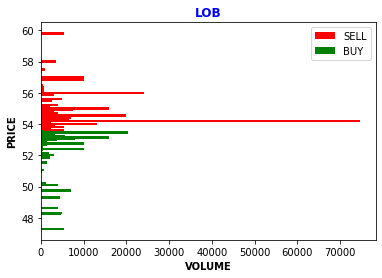

In [16]:
#Визуализация стакана лимитированных заявок до заданного момента времени
import matplotlib.pyplot as plt

font = {'family': 'sans-serif',
        'color':  'blue',
        'weight': 'bold',
        'size': 12,
        }

fig, ax = plt.subplots()
plt.title('LOB',loc='center',fontdict =font)
x = lob.index
y1 = lob['S']
y2 = lob['B']
plt.barh(x,y1,height = 0.15, label = 'SELL', color = 'r')
plt.barh(x,y2,height = 0.15, label = 'BUY', color = 'g')
plt.xlabel('VOLUME',weight= 'bold',size = 10)
plt.ylabel('PRICE',weight= 'bold',size = 10)
best_bid = max(lob[lob['B']>0].index)
best_ask = min(lob[lob['S']>0].index)
bid_ask_spread=best_bid-best_ask
print('Bid-ask spread:', bid_ask_spread)
plt.legend()
plt.show()


In [17]:
import pandas as pd
import numpy as np
def convert(sec, time_s, time_e, step, typE, conn):
    
    # time_s = левая часть интервала времени (HHMMSSZZZ)
    # time_e = правая часть интервала (HHMMSSZZZ)
    # step = длительность шага (т.е. для пятиминутного шага step = 5)
    # typE = единица измерения шага ('h', 'm', 's' или любое другое обозначение для миллисекунд)
    # sec = код бумаги в формате '\'CODE\''
    # conn = connection
    
    query="SELECT * FROM order_log WHERE \"TIME\"<="+str(time_e)+" AND \"SECCODE\"="+sec
    orders=pd.read_sql_query(query,conn)
        
    # Переводим начальное время в миллисекунды
    dts = str(time_s)
    h,m,s,z = int(dts[:2]),int(dts[2:4]),int(dts[4:6]),int(dts[6:])
    tsm = h * 3600000 + m * 60000 + s * 1000 + z
    
    # Переводим конечное время в миллисекунды
    dte = str(time_e)
    h,m,s,z = int(dte[:2]),int(dte[2:4]),int(dte[4:6]),int(dte[6:])
    tem = h * 3600000 + m * 60000 + s * 1000 + z
    
    # Переводим шаг в миллисекунды
    if typE == 'h':
        step = step * 3600000
    elif typE == 'm':
        step = step * 60000
    elif typE == 's':
        step = step * 1000

    times = []
    
    while tsm < tem:
        
        # Разбиваем время на отдельные часы, минуты, секунды и миллисекунды
        ha = tsm // 3600000
        ma = (tsm % 3600000) // 60000
        sa = (tsm % 60000) // 1000
        za = tsm % 1000
        
        # Переводим текущее время в "привычный формат"; добавляем его в список
        tmp = ha * 10000000 + ma * 100000 + sa * 1000 + za
        times.append(tmp)
        
        tsm = tsm + step;
    
    # Добавляем конечное время в список
    times.append(time_e)
    
    return(times)

convert('\'ALRS\'',100000000, 110000000, 5, 'm',conn) 
        

[100000000,
 100500000,
 101000000,
 101500000,
 102000000,
 102500000,
 103000000,
 103500000,
 104000000,
 104500000,
 105000000,
 105500000,
 110000000]

In [18]:
import pandas as pd
import numpy as np

def calc(sec, time_s, time_e, step, typE, conn):
    
    # time_s = левая часть интервала времени (HHMMSSZZZ)
    # time_e = правая часть интервала (HHMMSSZZZ)
    # step = длительность шага (т.е. для пятиминутного шага step = 5)
    # typE = единица измерения шага ('h', 'm', 's' или любое другое обозначение для миллисекунд)
    # sec = код бумаги в формате '\'CODE\''
    # conn = connection
    
    query="SELECT * FROM order_log WHERE \"TIME\"<="+str(time_e)+" AND \"SECCODE\"="+sec
    orders=pd.read_sql_query(query,conn)
        
    # Переводим начальное время в миллисекунды
    dts = str(time_s)
    h,m,s,z = int(dts[:2]),int(dts[2:4]),int(dts[4:6]),int(dts[6:])
    tsm = h * 3600000 + m * 60000 + s * 1000 + z
    
    # Переводим конечное время в миллисекунды
    dte = str(time_e)
    h,m,s,z = int(dte[:2]),int(dte[2:4]),int(dte[4:6]),int(dte[6:])
    tem = h * 3600000 + m * 60000 + s * 1000 + z
    
    # Переводим шаг в миллисекунды
    if typE == 'h':
        step = step * 3600000
    elif typE == 'm':
        step = step * 60000
    elif typE == 's':
        step = step * 1000

    times = []
    
    while tsm < tem:
        
        # Разбиваем время на отдельные часы, минуты, секунды и миллисекунды
        ha = tsm // 3600000
        ma = (tsm % 3600000) // 60000
        sa = (tsm % 60000) // 1000
        za = tsm % 1000
        
        # Переводим текущее время в "привычный формат"; добавляем его в список
        tmp = ha * 10000000 + ma * 100000 + sa * 1000 + za
        times.append(tmp)
        
        tsm = tsm + step;
    
    # Добавляем конечное время в список
    times.append(time_e)
    # Создаем пустой датафрейм
    
    results = pd.DataFrame(columns=['SECCODE','TIME','MID_PRICE','BA_SPREAD','BEST_B_VOL','BEST_S_VOL','M_imbalance','Bid_quoted_volume','Ask_quoted_volume','Quoted_spread','Av_quoted_volume','Best_bid','Best_ask','Total_volume'])
    
    # Далее идет функция расчета показателей
    MID_PRICE = []
    BA_SPREAD = []
    BEST_B_VOL = []
    BEST_S_VOL = []
    M_imbalance = []
    Bid_quoted_volume = []
    Ask_quoted_volume = []
    Quoted_spread = []
    Av_quoted_volume= []
    Best_bid = []
    Best_ask = []
    Total_volume = []
             
    for i in times:
        
        orders_i = orders[orders['TIME']<=i]
        
    # Устанавливаем маску лимитных заявок
        no_mrk_ind=orders_i['PRICE']!=0

    # Таблица выставленных заявок
        plc=orders_i[['ORDERNO','BUYSELL','PRICE','VOLUME']][(orders_i['ACTION']==1) & no_mrk_ind]

    # Таблица отозванных заявок
        wdr=orders_i[['ORDERNO','VOLUME']][(orders_i['ACTION']==0) & no_mrk_ind]
    
    # Таблица исполненных объемов
        trds=orders_i[['ORDERNO','VOLUME']][(orders_i['ACTION']==2) & no_mrk_ind] 
        trds=trds[['ORDERNO','VOLUME']].groupby(['ORDERNO']).sum()
        trds['ORDERNO']=trds.index
        trds.index=range(trds.shape[0])

    # Книга (aka стакан, aka LOB)
        lob=pd.merge(plc,wdr, on='ORDERNO',how='left',suffixes=('_plc','_wdr'))
        lob=pd.merge(lob,trds, on='ORDERNO', how='left')
        lob=lob.rename(columns={'VOLUME':'VOLUME_trds'})
        lob=lob.fillna(0)
        lob['TOTAL_VOL']=lob['VOLUME_plc']-lob['VOLUME_wdr']-lob['VOLUME_trds']
        lob=lob[lob['TOTAL_VOL']>0]
        
        #Поиск объема на каждом из интервалов
        total_volume = sum(lob['TOTAL_VOL'])
        Total_volume.append(total_volume)
        
        #Построение стакана       
        lob=lob.pivot_table(index='PRICE',columns='BUYSELL',values='TOTAL_VOL',aggfunc='sum')
        lob.sort_index(axis=0,inplace=True, ascending=False)
        lob=lob.fillna(0)
        
        bid = lob[lob['B']>0].index[0:5]
        ask = lob[lob['S']>0].index[-6:]
        ask.append(bid)
        best_lob=lob.loc[ask.append(bid)]
        
        #Нахождение лучшей цены bid и ask
    
        best_bid=max(lob[lob['B']>0].index)
        best_ask=min(lob[lob['S']>0].index)
        Best_bid.append(best_bid)
        Best_ask.append(best_ask)
        
        #Расчет показателей ценовой динамики и ликвидности, вычисляемые на основе книги лимитированных заявок
         
        mid_price=(best_bid+best_ask)/2
        MID_PRICE.append(mid_price)
        
        #Переведем в базисные пункты для расчетов PCA bid_ask spread

        bid_ask_spread=(best_ask-best_bid)*10000
        BA_SPREAD.append(bid_ask_spread)
        
        best_B_vol = lob['B'].loc[best_bid]
        BEST_B_VOL.append(best_B_vol)
        
        best_S_vol = lob['S'].loc[best_ask]
        BEST_S_VOL.append(best_S_vol)
        
        market_imbalance = (best_B_vol-best_S_vol)/ (best_B_vol+best_S_vol)
        M_imbalance.append(market_imbalance)
        
        bid_quoted_volume = sum(lob['B'])
        Bid_quoted_volume.append(bid_quoted_volume)   
        
        ask_quoted_volume = sum(lob['S'])
        Ask_quoted_volume.append(ask_quoted_volume)
        
        quoted_spread = ((best_ask-best_bid)/mid_price)*100
        Quoted_spread.append(quoted_spread)
        
        av_quoted_volume =(bid_quoted_volume+ask_quoted_volume)/2
        Av_quoted_volume.append(av_quoted_volume)
        
                                     
    results = pd.DataFrame({'SECCODE':sec, 'TIME': times,'MID_PRICE': MID_PRICE,'BA_SPREAD':BA_SPREAD,'BEST_B_VOL':BEST_B_VOL,'BEST_S_VOL':BEST_S_VOL, 'M_imbalance':M_imbalance,'Bid_quoted_volume':Bid_quoted_volume, 'Ask_quoted_volume':Ask_quoted_volume, 'Quoted_spread':Quoted_spread,'Av_quoted_volume':Av_quoted_volume,'Best_bid':best_bid,'Best_ask':best_ask,'Total_volume':Total_volume})    
    results['MID_PRICE'] = MID_PRICE
    results['BA_SPREAD'] = BA_SPREAD
    results['BEST_B_VOL'] = BEST_B_VOL
    results['BEST_S_VOL'] = BEST_S_VOL
    results['M_imbalance'] = M_imbalance
    results['TIME']= times
    results['Bid_quoted_volume']= Bid_quoted_volume
    results['Ask_quoted_volume']=Ask_quoted_volume
    results['Quoted_spread']=Quoted_spread
    results['Av_quoted_volume']=Av_quoted_volume
    results['Best_bid']=Best_bid
    results['Best_ask']=Best_ask
    results['Total_volume']=Total_volume
 
    
    return results   

In [20]:
x=calc('\'ALRS\'', 100000000, 110000000, 1, 'm', conn)
x

,SECCODE,TIME,MID_PRICE,BA_SPREAD,BEST_B_VOL,BEST_S_VOL,M_imbalance,Bid_quoted_volume,Ask_quoted_volume,Quoted_spread,Av_quoted_volume,Best_bid,Best_ask,Total_volume
0,'ALRS',100000000,53.895,500.0,100.0,2200.0,-0.913043,69800.0,229100.0,0.092773,149450.0,53.87,53.92,298900.0
1,'ALRS',100100000,53.655,1100.0,100.0,600.0,-0.714286,151200.0,298700.0,0.205014,224950.0,53.60,53.71,449900.0
2,'ALRS',100200000,53.680,1200.0,1000.0,1500.0,-0.200000,170400.0,330000.0,0.223547,250200.0,53.62,53.74,500400.0
3,'ALRS',100300000,53.735,1300.0,600.0,2300.0,-0.586207,195300.0,331100.0,0.241928,263200.0,53.67,53.80,526400.0
4,'ALRS',100400000,53.650,600.0,400.0,200.0,0.333333,186800.0,360000.0,0.111836,273400.0,53.62,53.68,546800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,'ALRS',105600000,53.675,300.0,3900.0,100.0,0.950000,322700.0,851500.0,0.055892,587100.0,53.66,53.69,1174200.0
57,'ALRS',105700000,53.695,100.0,1500.0,1800.0,-0.090909,423000.0,843500.0,0.018624,633250.0,53.69,53.70,1266500.0
58,'ALRS',105800000,53.690,200.0,800.0,7400.0,-0.804878,404200.0,849700.0,0.037251,626950.0,53.68,53.70,1253900.0
59,'ALRS',105900000,53.690,200.0,1800.0,7000.0,-0.590909,386500.0,842000.0,0.037251,614250.0,53.68,53.70,1228500.0


In [21]:
x.describe()

,TIME,MID_PRICE,BA_SPREAD,BEST_B_VOL,BEST_S_VOL,M_imbalance,Bid_quoted_volume,Ask_quoted_volume,Quoted_spread,Av_quoted_volume,Best_bid,Best_ask,Total_volume
count,6.100000e+01,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,6.100000e+01
mean,1.030656e+08,53.597377,396.721311,1395.081967,4222.950820,-0.430485,253554.098361,611196.721311,0.074044,432375.409836,53.577541,53.617213,8.647508e+05
std,1.952937e+06,0.186473,248.305734,2391.681851,4596.715981,0.501576,62897.023177,199755.279419,0.046341,125293.608384,0.188783,0.184970,2.505872e+05
min,1.000000e+08,53.250000,100.000000,100.000000,100.000000,-0.987097,69800.000000,229100.000000,0.018579,149450.000000,53.220000,53.280000,2.989000e+05
25%,1.015000e+08,53.385000,300.000000,400.000000,1500.000000,-0.769231,225300.000000,452100.000000,0.055778,341050.000000,53.370000,53.400000,6.821000e+05
50%,1.030000e+08,53.690000,300.000000,800.000000,2300.000000,-0.600000,247000.000000,519400.000000,0.056196,391200.000000,53.670000,53.700000,7.824000e+05
75%,1.045000e+08,53.730000,500.000000,1300.000000,5200.000000,-0.285714,266800.000000,818000.000000,0.093677,543250.000000,53.710000,53.750000,1.086500e+06
max,1.100000e+08,53.895000,1300.000000,16700.000000,20600.000000,0.950000,423000.000000,872800.000000,0.241928,633250.000000,53.870000,53.920000,1.266500e+06


In [22]:
y = calc('\'SBER\'', 100000000, 110000000, 1, 'm', conn)
y

,SECCODE,TIME,MID_PRICE,BA_SPREAD,BEST_B_VOL,BEST_S_VOL,M_imbalance,Bid_quoted_volume,Ask_quoted_volume,Quoted_spread,Av_quoted_volume,Best_bid,Best_ask,Total_volume
0,'SBER',100000000,106.865,300.0,10.0,24480.0,-0.999183,1446630.0,2164490.0,0.028073,1805560.0,106.85,106.88,3611120.0
1,'SBER',100100000,106.280,200.0,50.0,450.0,-0.800000,1816890.0,2087810.0,0.018818,1952350.0,106.27,106.29,3904700.0
2,'SBER',100200000,106.265,100.0,5160.0,400.0,0.856115,1916880.0,1825700.0,0.009410,1871290.0,106.26,106.27,3742580.0
3,'SBER',100300000,106.070,400.0,750.0,1250.0,-0.250000,1832520.0,2017690.0,0.037711,1925105.0,106.05,106.09,3850210.0
4,'SBER',100400000,106.255,300.0,2540.0,700.0,0.567901,2345650.0,1751940.0,0.028234,2048795.0,106.24,106.27,4097590.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,'SBER',105600000,106.630,400.0,220.0,1350.0,-0.719745,3764220.0,3010910.0,0.037513,3387565.0,106.61,106.65,6775130.0
57,'SBER',105700000,106.645,100.0,1250.0,20.0,0.968504,4047950.0,3167380.0,0.009377,3607665.0,106.64,106.65,7215330.0
58,'SBER',105800000,107.105,100.0,389690.0,500.0,0.997437,4198870.0,2441270.0,0.009337,3320070.0,107.10,107.11,6640140.0
59,'SBER',105900000,107.095,100.0,2450.0,27330.0,-0.835460,3814470.0,2360150.0,0.009338,3087310.0,107.09,107.10,6174620.0


In [23]:
y.describe()

,TIME,MID_PRICE,BA_SPREAD,BEST_B_VOL,BEST_S_VOL,M_imbalance,Bid_quoted_volume,Ask_quoted_volume,Quoted_spread,Av_quoted_volume,Best_bid,Best_ask,Total_volume
count,6.100000e+01,61.000000,61.000000,61.000000,61.000000,61.000000,6.100000e+01,6.100000e+01,61.000000,6.100000e+01,61.000000,61.000000,6.100000e+01
mean,1.030656e+08,106.233033,218.032787,10804.754098,8003.770492,-0.170620,3.368676e+06,2.684808e+06,0.020527,3.026742e+06,106.222131,106.243934,6.053484e+06
std,1.952937e+06,0.361760,142.019009,51560.729585,21230.213782,0.735604,7.150257e+05,7.183600e+05,0.013375,6.470159e+05,0.362244,0.361415,1.294032e+06
min,1.000000e+08,105.430000,100.000000,10.000000,10.000000,-0.999183,1.446630e+06,1.697460e+06,0.009337,1.805560e+06,105.420000,105.440000,3.611120e+06
25%,1.015000e+08,106.070000,100.000000,230.000000,640.000000,-0.857143,2.778210e+06,2.164490e+06,0.009419,2.443405e+06,106.050000,106.090000,4.886810e+06
50%,1.030000e+08,106.210000,200.000000,1200.000000,1740.000000,-0.360465,3.761870e+06,2.446690e+06,0.018818,3.094785e+06,106.200000,106.220000,6.189570e+06
75%,1.045000e+08,106.360000,300.000000,2450.000000,5900.000000,0.581818,3.907310e+06,3.167380e+06,0.028199,3.607665e+06,106.330000,106.390000,7.215330e+06
max,1.100000e+08,107.420000,700.000000,389690.000000,150390.000000,0.997437,4.198870e+06,3.966260e+06,0.065960,3.955695e+06,107.410000,107.430000,7.911390e+06
